# Lab 8
### Part I: Saving Test Output & Part II: Calculation of Intersection over Union (IoU)
Completed by: Liliya Panfilova, Davender Singh



In [27]:
# imports
import dlib
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import imutils
import csv

C:/Users/Liliya/faces/Debra_Messing_0001.jpg


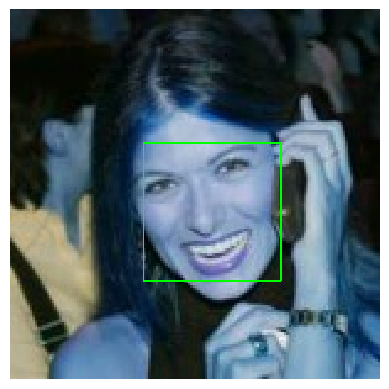

C:/Users/Liliya/faces/Debra_Messing_0002.jpg


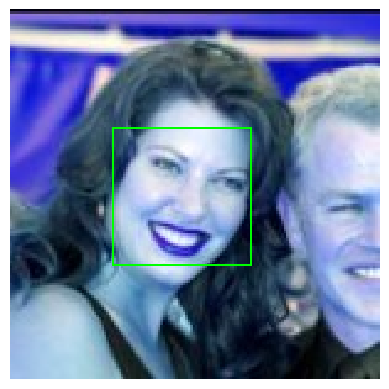

C:/Users/Liliya/faces/Elisabeth_Schumacher_0001.jpg
C:/Users/Liliya/faces/Janica_Kostelic_0001.jpg


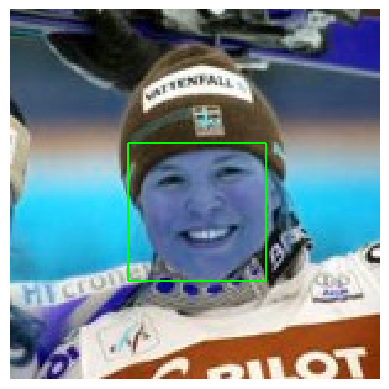

C:/Users/Liliya/faces/Jim_OBrien_0001.jpg


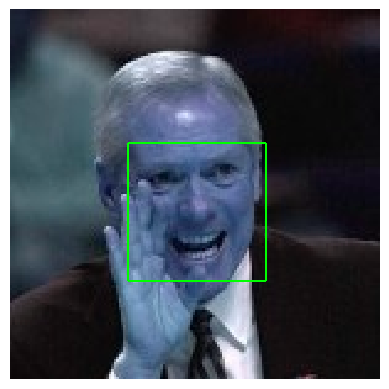

C:/Users/Liliya/faces/Jim_OBrien_0002.jpg


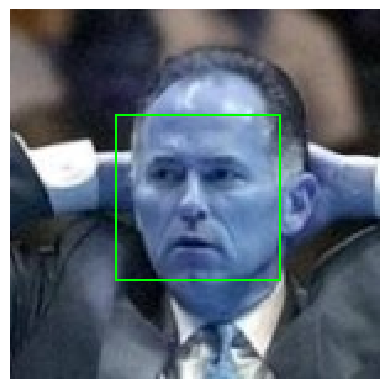

C:/Users/Liliya/faces/Martha_Bowen_0002.jpg


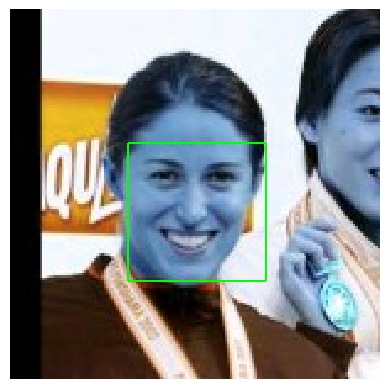

C:/Users/Liliya/faces/Nora_Bendijo_0002.jpg


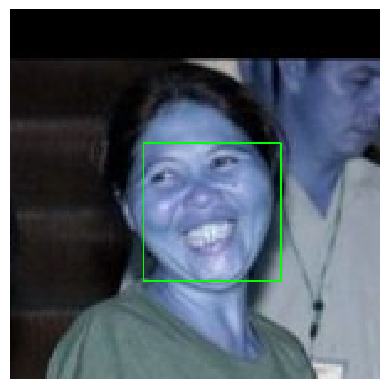

GT list:  [[190, 178, 253, 300], [134, 145, 279, 313], [164, 196, 244, 281], [201, 240, 229, 210], [148, 140, 246, 330], [195, 117, 256, 358], [166, 154, 230, 302], [193, 156, 239, 300]]
Preditcions list:  [[216, 217, 223, 223], [167, 192, 223, 223], 'No Face Detected.', [191, 217, 223, 223], [191, 217, 223, 223], [171, 171, 267, 268], [191, 217, 223, 223], [216, 217, 223, 223]]
IoU list:  [(0.6551910408432148, 49729, 75900), (0.5694573270580691, 49729, 87327), (0.7714735869899854, 42600, 55219), (0.5285964502568893, 45269, 85640), (0.6639885807504078, 65124, 98080), (0.6221928845578028, 45715, 73474), (0.6574848828162324, 48168, 73261)]
Average IoU:  0.638340679038943


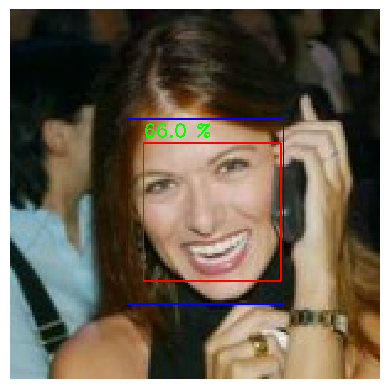

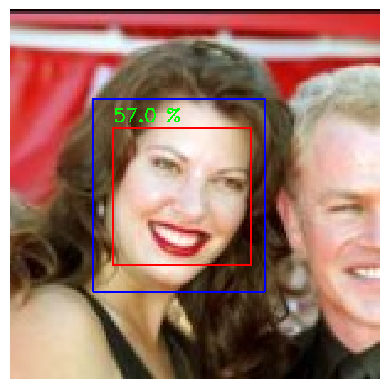

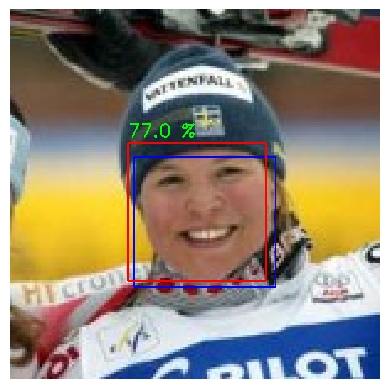

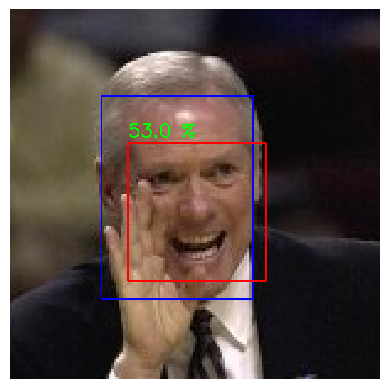

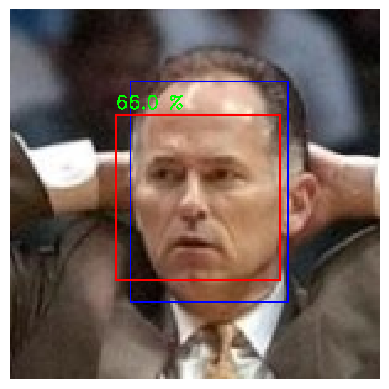

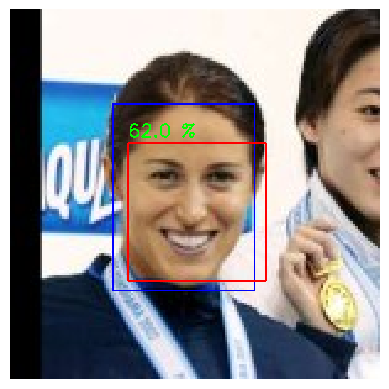

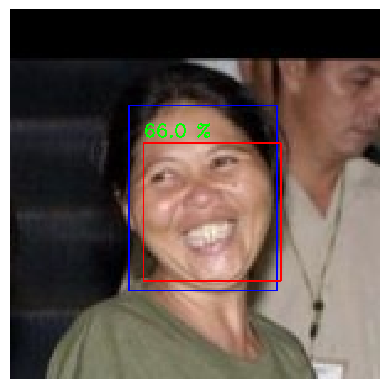

In [7]:
path = 'C:/Users/Liliya/faces'
list_file = 'list.csv'
gt_file = 'gt.csv'
alg_file = 'C:/Users/Liliya/detections.csv'
frontalface_detector = dlib.get_frontal_face_detector()
gt_box_list = []
pred_box_list = []
ious_list = []

def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)

def detect_face(image_path):
    try:
        image = cv.imread(image_path)
        
        image = imutils.resize(image, width=600)
        # convert image from BRG format to RGB format
        rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

        # pass RGB image to frontalface_detector (returns rectangle coordinates)
        # argument 1, says that we should upsample the image 1 time (keeping image the same without any 
        # modifications)
        rects = frontalface_detector(rgb, 1)

        # if no rectangle was returned, than no face was detected
        if len(rects) < 1:
            return "No Face Detected."

        # open/create detections.csv file
        with open(alg_file, 'a', newline='') as file:
            # create a writer object
            writer = csv.writer(file)
            # for every rectangle
            for (i, rect) in enumerate(rects):
                # get upper left coordinates, width and heigth
                (x, y, w, h) = rect_to_bb(rect)
                # draw rectangle on the image
                cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                # save coordinates in detections.csv file
                writer.writerow([image_path, x, y, w, h])

        # plot the image, use nearest pixels for interpolation (used for rescaling)
        plt.imshow(image, interpolation='nearest')
        plt.axis('off')
        plt.show()
        return [x, y, w, h]
    except:
        return "Error!"

# calculatee the IoU for an image
def intersection_over_union(gt_box, pred_box):
    inter_box_top_left = [max(gt_box[0], pred_box[0]), max(gt_box[1], pred_box[1])]
    inter_box_bottom_right = [min(gt_box[0]+gt_box[2], pred_box[0]+pred_box[2]), min(gt_box[1]+gt_box[3], pred_box[1]+pred_box[3])]
    inter_box_w = inter_box_bottom_right[0] - inter_box_top_left[0]
    inter_box_h = inter_box_bottom_right[1] - inter_box_top_left[1]
    intersection = inter_box_w * inter_box_h
    union = gt_box[2] * gt_box[3] + pred_box[2] * pred_box[3] - intersection   
    iou = intersection / union
    return iou, intersection, union

# open list.csv for reading
with open(list_file, 'r') as file:
    # create a csv.reader object
    reader = csv.reader(file)
    # iterate through rows using reader object
    for row in reader:
        # print image path
        print(path + '/' + row[0])
        # detect image on this path
        pred_rect = detect_face(path + '/'+ row[0])
        pred_box_list.append(pred_rect)

# create a list of ground truth box coordinates
with open(gt_file, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        gt_box_list.append([int(row[1]), int(row[2]), int(row[3]), int(row[4])])

# calculate IoU and save them to the list
for i, pred in enumerate(pred_box_list):
    if(pred == 'No Face Detected.'):
        ious_list.append('No Face Detected.')
    else:
        ious_list.append(intersection_over_union(gt_box_list[i], pred_box_list[i]))
        
# print gt and prediction bounding boxes, IoU list, average IOU
print('GT list: ', gt_box_list)
print('Preditcions list: ', pred_box_list)
ious_list_detected = [x for x in ious_list if x != 'No Face Detected.']
print('IoU list: ', ious_list_detected)
avg_iou = sum(float(item[0]) for item in ious_list_detected) / len(ious_list_detected)
print('Average IoU: ', avg_iou)

# draw a red bounding box around predicted faces and a blue bounding box around ground truth, show the corresponding IoU on the image
with open(list_file, 'r') as file:
    # create a csv.reader object
    reader = csv.reader(file)
    # iterate through rows using reader object
    for i, row in enumerate(reader):
        image = cv.imread(path + '/'+ row[0])
        rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        
        rgb_image = imutils.resize(rgb_image, width=600)
        if(pred_box_list[i] != 'No Face Detected.'):
            (x, y, w, h) = gt_box_list[i]
            cv.rectangle(rgb_image, (x, y), (x + w, y + h), (0, 0, 255), 2)
            iou_txt = str(round(ious_list[i][0]*100, 0)) + ' %'
            (x, y, w, h) = pred_box_list[i]
            cv.putText(rgb_image, iou_txt, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            cv.rectangle(rgb_image, (x, y), (x + w, y + h), (255, 0, 0), 2)
            plt.imshow(rgb_image, interpolation='nearest')
            plt.axis('off')
            plt.show()

# Part III: Precision, Recall, and F1 from IoU

In [26]:
def calculate_metrics(iou_list, num_face_files, threshold):
    # Count true positives, false positives, and false negatives
    true_positives = sum(iou >= threshold for iou in iou_list) 
    false_positives = len(iou_list) - true_positives
    false_negatives = num_face_files - len(iou_list)

    # Calculate precision, recall, and F1 score
    precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

    return precision, recall, f1_score

precisions = []
recalls = []

num_face_files = 8
ious = [float(item[0]) for item in ious_list_detected]
for threshold in np.arange(0, 1, 0.1):
    precision, recall, f1_score = calculate_metrics(ious, num_face_files, threshold)
    precisions.append(precision)
    recalls.append(recall)
    print(f"\nThreshold: {threshold}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")

print(precisions)
print(recalls)


Threshold: 0.0
Precision: 1.00
Recall: 0.88
F1 Score: 0.93

Threshold: 0.1
Precision: 1.00
Recall: 0.88
F1 Score: 0.93

Threshold: 0.2
Precision: 1.00
Recall: 0.88
F1 Score: 0.93

Threshold: 0.30000000000000004
Precision: 1.00
Recall: 0.88
F1 Score: 0.93

Threshold: 0.4
Precision: 1.00
Recall: 0.88
F1 Score: 0.93

Threshold: 0.5
Precision: 1.00
Recall: 0.88
F1 Score: 0.93

Threshold: 0.6000000000000001
Precision: 0.71
Recall: 0.83
F1 Score: 0.77

Threshold: 0.7000000000000001
Precision: 0.14
Recall: 0.50
F1 Score: 0.22

Threshold: 0.8
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Threshold: 0.9
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7142857142857143, 0.14285714285714285, 0.0, 0.0]
[0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.8333333333333334, 0.5, 0.0, 0.0]


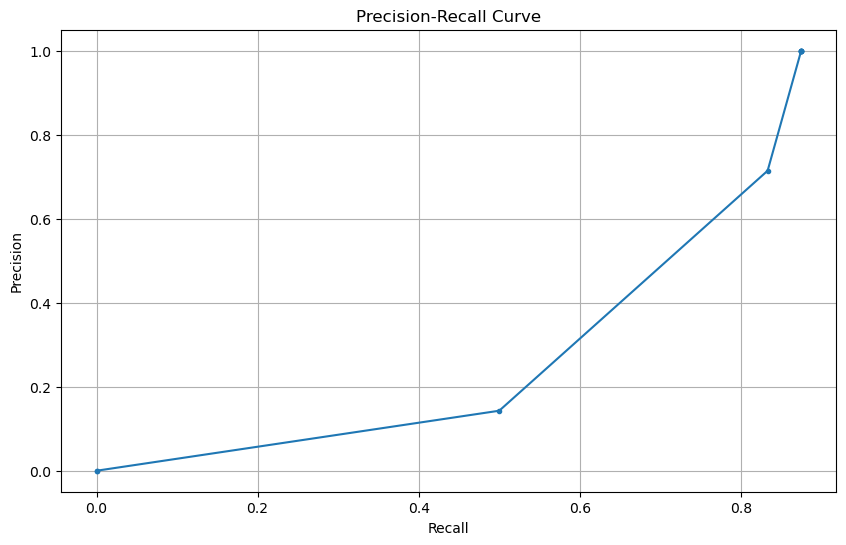

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(recalls, precisions, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()